In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


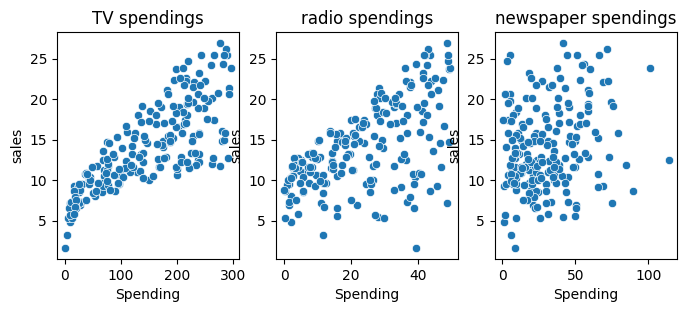

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3), dpi=100)
for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y = "sales", ax = ax[i])
    ax[i].set(xlabel = "Spending", title = f"{feature} spendings"    )

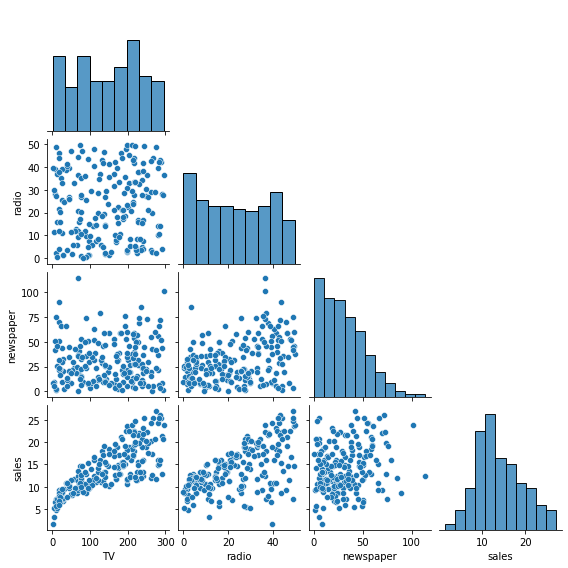

In [14]:
sns.pairplot(df, corner =True,  height =2)

## Simple linear refgression

Intercept 7.033
Slope 0.048


<AxesSubplot:xlabel='TV', ylabel='sales'>

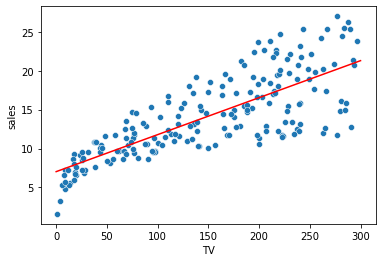

In [20]:
X, y  = df["TV"], df["sales"] 
beta_1, beta_0 = np.polyfit(X, y, deg=1)
print(f"Intercept {beta_0:.3f}")
print(f"Slope {beta_1:.3f}")

def y_hat(x): return beta_0 + beta_1 * x

spend = np.linspace(0,300)

sns.scatterplot(data = df, x = "TV", y = "sales")
sns.lineplot(x =spend, y = y_hat(spend), color =  "red")

<AxesSubplot:xlabel='TV', ylabel='sales'>

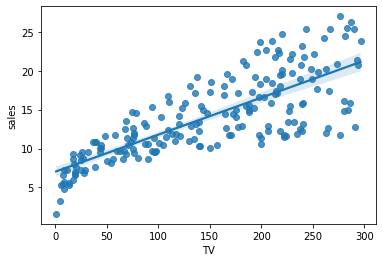

In [21]:
sns .regplot(x = X, y = y)

## Multiple linear regression

In [31]:
X, y = df.drop("sales", axis = "columns"), df["sales"]
X.insert(0, "intercept", 1)


regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat = regression_fit(X, y)
print(beta_hat)

predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(y_hat)
print(y.iloc[0])

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64
20.523974409715148
22.1


## Train/test split 

In [44]:
train_fraction = int(len(df) * 0.7)
print("train data:", train_fraction)
print("test data:", len(df) - train_fraction)

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(train.index)

train.index.isin(test.index).sum()

X_train, y_train = train.drop("sales", axis = 1), train["sales"]
X_test, y_test = test.drop("sales", axis = 1), test["sales"]

X_train.insert(0, "intercept", 1)
X_test.insert(0, "intercept", 1)



train data: 140
test data: 60


## Prediction

In [48]:
beta_hat =regression_fit(X_train, y_train)
precict =lambda X, weights: X @ weights

y_hat = precict(X_test.to_numpy(), beta_hat.to_numpy().reshape(4,1))
y_hat[:5], y_test[:5]

(array([[12.17324122],
        [12.19125728],
        [ 3.74653773],
        [ 8.90545078],
        [18.43980126]]),
 2     10.4
 8     13.2
 9      4.8
 14     9.7
 15    19.0
 Name: sales, dtype: float64)

## Evaluation

- MAE - Mean absolute error
- MSE - Mean square error
- RMSE - Root mean square error 

In [51]:
m = len(y_test)
y_hat = np.reshape(y_hat, m)

MAE = 1/m *np.sum(np.abs(y_test - y_hat))
MSE = 1/m *np.sum((y_test - y_hat)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)